Softmax regression 모델이 학습한 결정경계와 데이터포인트 시각화

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


# make_blobs -> 가상 클러스터를 생성하여 랜덤한 데이터셋 만들때 많이 사용
# ( 군집화 데이터 혹은 그룹 데이터 ) 

create toy dataset

In [2]:
X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)

convert data to pytorch tensors

In [3]:
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).long()

define softmax regression model

In [4]:
class SoftmaxRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SoftmaxRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, x):
        out = self.linear(x)
        return out

intantiate model

In [5]:
input_size = 2
num_classes = 3
model = SoftmaxRegression(input_size, num_classes)

define loss function and optimizer

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

train model

In [8]:
num_epochs = 1000
for epoch in range(num_epochs):
    
    # Forward pass and calculate loss
    outputs = model(X)
    loss = criterion(outputs, y)
    
    # backward pass and update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print("Epoch [{}/{}], Loss: {:.4f}".format(epoch+1, num_epochs, loss.item()))

Epoch [100/1000], Loss: 0.0236
Epoch [200/1000], Loss: 0.0170
Epoch [300/1000], Loss: 0.0135
Epoch [400/1000], Loss: 0.0112
Epoch [500/1000], Loss: 0.0097
Epoch [600/1000], Loss: 0.0086
Epoch [700/1000], Loss: 0.0077
Epoch [800/1000], Loss: 0.0070
Epoch [900/1000], Loss: 0.0064
Epoch [1000/1000], Loss: 0.0059


plot decision boundary

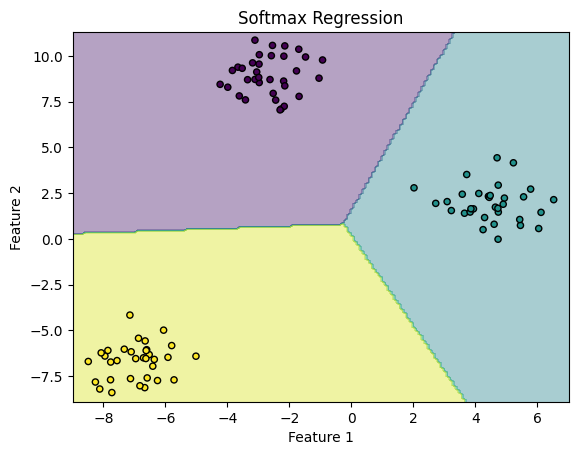

In [11]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.1), torch.arange(y_min, y_max, 0.1))
Z = model(torch.cat((xx.reshape(-1,1), yy.reshape(-1,1)), dim=1)).argmax(dim=1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
plt.title('Softmax Regression')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()